In [3]:
import pandas as pd

import glob

path='saidasFPGA10/'

files = [f for f in glob.glob(path + "*.out", recursive=True)]
    
for f in files:
    print(f)

saidasFPGA10/OCL-FPGA_64-16_B_Kimono_1920x1080_24_RA_37_0.out
saidasFPGA10/OCL-FPGA_64-08_E_Johnny_1280x720_60_RA_37_0.out
saidasFPGA10/OCL-FPGA_64-64_B_Cactus_1920x1080_50_RA_37_0.out
saidasFPGA10/OCL-FPGA_32-32_B_BasketballDrive_1920x1080_50_LD_32_0.out
saidasFPGA10/OCL-FPGA_32-16_B_Cactus_1920x1080_50_RA_27_0.out
saidasFPGA10/OCL-FPGA_16-08_E_KristenAndSara_1280x720_60_LD_22_0.out
saidasFPGA10/OCL-FPGA_16-16_B_BQTerrace_1920x1080_60_RA_32_0.out
saidasFPGA10/OCL-FPGA_64-16_B_Kimono_1920x1080_24_LD_27_0.out
saidasFPGA10/OCL-FPGA_64-08_B_ParkScene_1920x1080_24_RA_27_0.out
saidasFPGA10/OCL-FPGA_64-32_B_BasketballDrive_1920x1080_50_RA_22_0.out
saidasFPGA10/OCL-FPGA_16-16_E_Johnny_1280x720_60_RA_37_0.out
saidasFPGA10/OCL-FPGA_64-08_B_ParkScene_1920x1080_24_LD_22_0.out
saidasFPGA10/OCL-FPGA_16-08_B_BQTerrace_1920x1080_60_RA_32_0.out
saidasFPGA10/C-CPU_E_Johnny_1280x720_60_LD_37_0.out
saidasFPGA10/OCL-FPGA_32-32_B_BQTerrace_1920x1080_60_LD_32_0.out
saidasFPGA10/OCL-FPGA_64-64_E_Johnny_1280x

In [4]:
def getData(f):
    dict_temp = {}
    fp = open(f,'r')
    for line in fp:
        if ":" in line and line[0] != 'I' and line != '\n':
            key = line.split(":")[0]
            value = float(line.split(":")[1].split("\n")[0])
            dict_temp[key] = value
            if f.split('/')[1][0] == "C":
                if key == "tMCLuma_clk":
                    dict_temp['file_name'] = f.split('/')[1]
                    dict_temp['dev'] = f.split('/')[1].split('-')[1].split('_')[0]
                    dict_temp['vid'] = f.split('/')[1].split('_')[2]
                    dict_temp['qp'] = f.split('/')[1].split('_')[6]
                    dict_temp['type'] = f.split('/')[1].split('_')[5]
                    dict_temp['config'] = "0-0"
                    return dict_temp
            if f.split('/')[1][0] == "O":
                if key == "tOutput_cout":
                    dict_temp['file_name'] = f.split('/')[1]
                    dict_temp['dev'] = f.split('/')[1].split('-')[1].split('_')[0]
                    dict_temp['vid'] = f.split('/')[1].split('_')[3]
                    dict_temp['config'] = f.split('/')[1].split('_')[1]
                    dict_temp['qp'] = f.split('/')[1].split('_')[7]
                    dict_temp['type'] = f.split('/')[1].split('_')[6]
                    return dict_temp
                    
    

In [5]:
df = pd.DataFrame()
df_CPU = pd.DataFrame()
df_FPGA = pd.DataFrame()

for f in files:
    df = df.append(getData(f), ignore_index = True)
 

In [6]:
df_CPU = df[df['dev'] == "CPU"]
df_FPGA = df[df['dev'] == "FPGA"]

In [7]:
#df.to_csv('fpga_libde265.csv')

In [8]:
df[0:30]

,Frames,Frames_cout,TotalDe265,TotalDe265_cout,config,dev,file_name,fps,fps_cout,qp,...,tyFracl,tyFracl_cout,type,vid,tGenerateInterPredictionSamples,tGenerateInterPredictionSamples_clk,tMCLuma,tMCLuma_clk,tReadCodingUnit,tReadCodingUnit_clk
0,10.0,10.0,16.18543,16.185400,64-16,FPGA,OCL-FPGA_64-16_B_Kimono_1920x1080_24_RA_37_0.out,0.62,0.617839,37,...,0.767790,0.767790,RA,Kimono,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,10.0,5.98375,5.983750,64-08,FPGA,OCL-FPGA_64-08_E_Johnny_1280x720_60_RA_37_0.out,1.67,1.671190,37,...,0.222146,0.222146,RA,Johnny,NaN,NaN,NaN,NaN,NaN,NaN
2,10.0,10.0,9.23421,9.234210,64-64,FPGA,OCL-FPGA_64-64_B_Cactus_1920x1080_50_RA_37_0.out,1.08,1.082930,37,...,0.229810,0.229810,RA,Cactus,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,10.0,4.64179,4.641790,32-32,FPGA,OCL-FPGA_32-32_B_BasketballDrive_1920x1080_50_...,2.15,2.154340,32,...,0.179699,0.179699,LD,BasketballDrive,NaN,NaN,NaN,NaN,NaN,NaN
4,10.0,10.0,14.49072,14.490700,32-16,FPGA,OCL-FPGA_32-16_B_Cactus_1920x1080_50_RA_27_0.out,0.69,0.690097,27,...,0.930378,0.930378,RA,Cactus,NaN,NaN,NaN,NaN,NaN,NaN
5,10.0,10.0,5.19429,5.194290,16-08,FPGA,OCL-FPGA_16-08_E_KristenAndSara_1280x720_60_LD...,1.93,1.925190,22,...,0.376827,0.376827,LD,KristenAndSara,NaN,NaN,NaN,NaN,NaN,NaN
6,10.0,10.0,5.99481,5.994810,16-16,FPGA,OCL-FPGA_16-16_B_BQTerrace_1920x1080_60_RA_32_...,1.67,1.668110,32,...,0.290768,0.290768,RA,BQTerrace,NaN,NaN,NaN,NaN,NaN,NaN
7,10.0,10.0,17.42939,17.429400,64-16,FPGA,OCL-FPGA_64-16_B_Kimono_1920x1080_24_LD_27_0.out,0.57,0.573743,27,...,1.033680,1.033680,LD,Kimono,NaN,NaN,NaN,NaN,NaN,NaN
8,10.0,10.0,36.37373,36.373700,64-08,FPGA,OCL-FPGA_64-08_B_ParkScene_1920x1080_24_RA_27_...,0.27,0.274924,27,...,2.547030,2.547030,RA,ParkScene,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,10.0,12.84788,12.847900,64-32,FPGA,OCL-FPGA_64-32_B_BasketballDrive_1920x1080_50_...,0.78,0.778338,22,...,0.439216,0.439216,RA,BasketballDrive,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
videos = set(df['vid'].tolist())
videos

{'BQTerrace',
 'BasketballDrive',
 'Cactus',
 'FourPeople',
 'Johnny',
 'Kimono',
 'KristenAndSara',
 'ParkScene'}

In [79]:
df.columns

Index(['Frames', 'Frames_cout', 'TotalDe265', 'TotalDe265_cout', 'config',
       'dev', 'file_name', 'fps', 'fps_cout', 'qp', 'tInput', 'tInput_cout',
       'tKernel', 'tKernel_cout', 'tOutput', 'tOutput_cout', 'tTotal',
       'tTotal_clk', 'tTotal_clk_cout', 'tTotal_cout', 'txFracl',
       'txFracl_cout', 'tyFracl', 'tyFracl_cout', 'type', 'vid',
       'tGenerateInterPredictionSamples',
       'tGenerateInterPredictionSamples_clk', 'tMCLuma', 'tMCLuma_clk',
       'tReadCodingUnit', 'tReadCodingUnit_clk'],
      dtype='object')

In [81]:
df[['TotalDe265','qp','tTotal_clk']]

,TotalDe265,qp,tTotal_clk
0,16.18543,37,10.13
1,5.98375,37,2.99
2,9.23421,37,4.35
3,4.64179,32,3.79
4,14.49072,27,12.21
...,...,...,...
699,8.57012,37,4.62
700,10.24801,32,9.45
701,8.52981,37,4.32
702,29.08966,27,22.59


In [108]:
from plotnine import *
import numpy as np
#https://matplotlib.org/3.1.1/_modules/matplotlib/markers.html
dict_plot_ld = {}
df_ld = df[df['type'] == 'LD'] 
for v in videos:
    dict_plot_ld[v] = ggplot(df_ld[df_ld['vid'] == v], aes(x='config', y='fps', colour='qp', shape='dev'))+\
         geom_point(size = 3)+\
        scale_shape_manual(values = ['^','o'])+\
        labs(title = v + ' - LD',
            x='Configuração',
            y='FPS',
            colour='QP',
            shape='Device')

dict_plot_ra = {}
df_ra = df[df['type'] == 'RA'] 
for v in videos:
    dict_plot_ra[v] = ggplot(df_ra[df_ra['vid'] == v], aes(x='config', y='fps', colour='qp', shape='dev'))+\
         geom_point(size = 3)+\
        scale_shape_manual(values = ['^','o'])+\
        labs(title = v + ' - RA',
            x='Configuração',
            y='FPS',
            colour='QP',
            shape='Device')


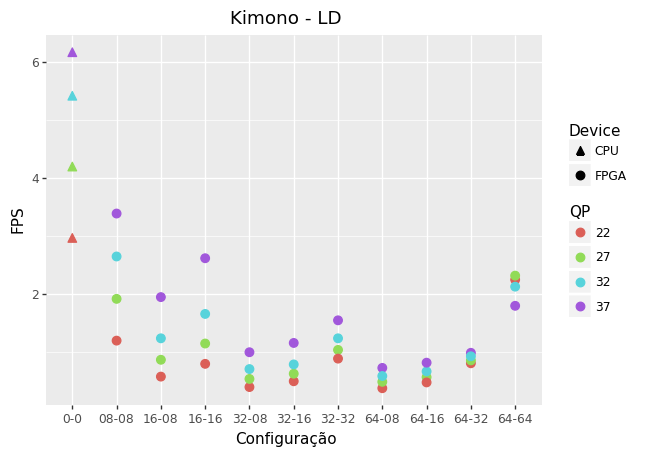

<ggplot: (8770052650013)>

In [109]:
dict_plot_ld['Kimono']

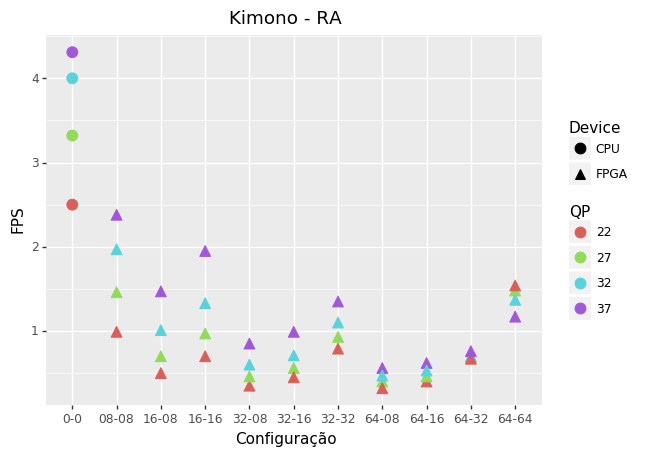

<ggplot: (8770053095951)>

In [45]:
dict_plot_ra['Kimono']

In [111]:
for v in videos:
    dict_plot_ld[v].save('plots/{}_LD.jpeg'.format(v))
    dict_plot_ra[v].save('plots/{}_RA.jpeg'.format(v))

/home/douglaswahastdacosta/.local/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/douglaswahastdacosta/.local/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: plots/Kimono_LD.jpeg
  warn('Filename: {}'.format(filename), PlotnineWarning)


FileNotFoundError: [Errno 2] No such file or directory: 'plots/Kimono_LD.jpeg'